<a href="https://colab.research.google.com/github/ShapatinAA/smgmo/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

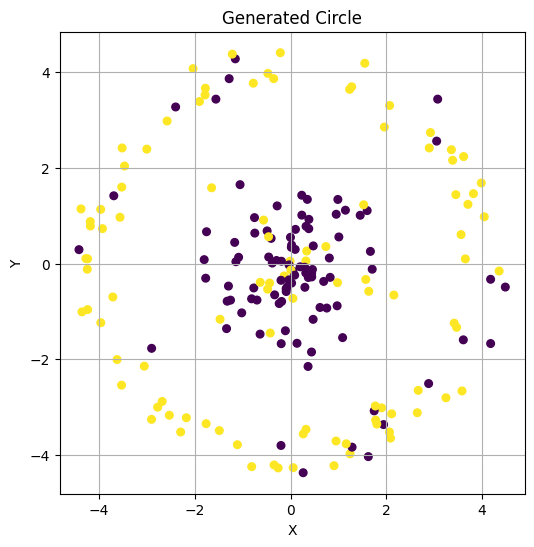

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle_with_center_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability):
    # Generate points for the ring
    angles_ring = np.random.rand(num_points_ring) * 2 * np.pi
    x_ring = radius_ring * np.cos(angles_ring)
    y_ring = radius_ring * np.sin(angles_ring)

    # Generate points for the center circle
    angles_range = np.random.rand(num_points_center) * 2 * np.pi
    radius_range = np.random.uniform(0, radius_center, num_points_center)
    x_center = radius_range * np.cos(angles_range)
    y_center = radius_range * np.sin(angles_range)

    # Combine coordinates of the ring and center circle
    x = np.concatenate((x_ring, x_center))
    y = np.concatenate((y_ring, y_center))

    # Add noise
    x += np.random.uniform(-noise_range, noise_range, len(x))
    y += np.random.uniform(-noise_range, noise_range, len(y))

    # Generate labels (0 for center circle, 1 for outer ring)
    labels_ring = np.ones(num_points_ring)
    labels_center = np.zeros(num_points_center)

    # Randomly assign some points in the ring and center circle labels based on probabilities
    num_points_to_change_ring = int(probability * num_points_ring)
    num_points_to_change_center = int(probability * num_points_center)

    random_indices_ring = np.random.choice(num_points_ring, size=num_points_to_change_ring, replace=False)
    random_indices_center = np.random.choice(num_points_center, size=num_points_to_change_center, replace=False)

    labels_ring[random_indices_ring] = 0
    labels_center[random_indices_center] = 1

    labels = np.concatenate((labels_ring, labels_center))


    # Combine coordinates and labels into a single array
    data = np.column_stack((x, y, labels))

    return data

# Generate circle with center circle data
radius_ring = 4
radius_center = 2
num_points_ring = 100
num_points_center = 100
noise_range = 0.5  # Range of uniform noise
probability = 0.2
circle_data = generate_circle_with_center_circle(radius_ring, radius_center, num_points_ring, num_points_center, noise_range, probability)

# Visualize the circle with center circle data
plt.figure(figsize=(6, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], c=circle_data[:, 2], cmap='viridis', s=30)
plt.title('Generated Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

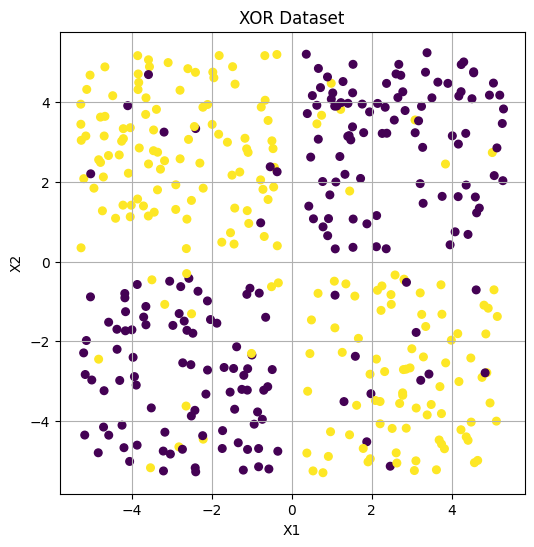

In [48]:
def generate_xor_dataset(num_points):
    # Generate XOR data points

    x1 = np.random.uniform(-5, 5, num_points)
    x2 = np.random.uniform(-5, 5, num_points)
    y = np.logical_xor(x1 > 0, x2 > 0)

    # Add padding
    padding = 0.3
    x1 += np.where(x1 > 0, padding, -padding)
    x2 += np.where(x2 > 0, padding, -padding)

    # Randomly assign some points labels based on probabilities
    num_points_to_change = int(0.1 * num_points)
    random_indices = np.random.choice(num_points, size=num_points_to_change, replace=False)
    y[random_indices] = np.logical_not(y[random_indices])

    # Combine coordinates and labels into a single array
    data = np.column_stack((x1, x2, y))

    return data

# Generate XOR dataset
num_points = 400
xor_data = generate_xor_dataset(num_points)

# Visualize the XOR dataset
plt.figure(figsize=(6, 6))
plt.scatter(xor_data[:, 0], xor_data[:, 1], c=xor_data[:, 2], cmap='viridis', s=30)
plt.title('XOR Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

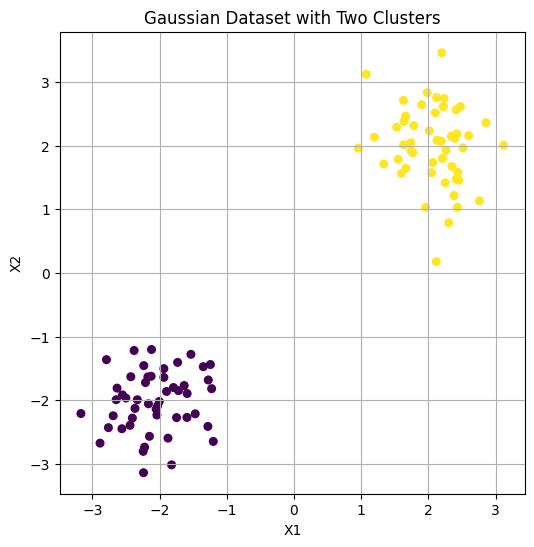

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def classify_two_gauss_data(num_samples, noise):
    points = []

    variance_scale = lambda x: np.interp(x, [0, 0.5], [0.5, 4])
    variance = variance_scale(noise)

    def gen_gauss(cx, cy, label):
        for i in range(num_samples // 2):
            x = np.random.normal(cx, variance)
            y = np.random.normal(cy, variance)
            points.append([x, y, label])

    gen_gauss(2, 2, 1)  # Gaussian with positive examples.
    gen_gauss(-2, -2, 0)  # Gaussian with negative examples.

    return np.array(points)

# Example usage:
num_samples = 100
noise = 0.0
gauss_data = classify_two_gauss_data(num_samples, noise)

# Visualize the Gaussian dataset
plt.figure(figsize=(6, 6))
plt.scatter(gauss_data[:, 0], gauss_data[:, 1], c=gauss_data[:, 2], cmap='viridis', s=30)
plt.title('Gaussian Dataset with Two Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

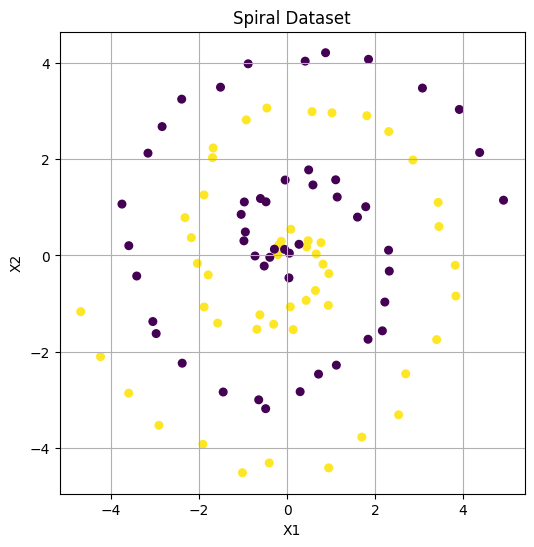

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def classify_spiral_data(num_samples, noise):
    points = []
    n = num_samples // 2

    def gen_spiral(delta_t, label):
        for i in range(n):
            r = i / n * 5
            t = 1.75 * i / n * 2 * np.pi + delta_t
            x = r * np.sin(t) + np.random.uniform(-1, 1) * noise
            y = r * np.cos(t) + np.random.uniform(-1, 1) * noise
            points.append([x, y, label])

    gen_spiral(0, 1)  # Positive examples.
    gen_spiral(np.pi, -1)  # Negative examples.

    return np.array(points)

# Example usage:
num_samples = 100
noise = 0.3
spiral_data = classify_spiral_data(num_samples, noise)

# Visualize the spiral dataset
plt.figure(figsize=(6, 6))
plt.scatter(spiral_data[:, 0], spiral_data[:, 1], c=spiral_data[:, 2], cmap='viridis', s=30)
plt.title('Spiral Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()